This page aims to find the best method for maximizing profit with our best model
That can be broken down as finding the best staking strategy
Some strategies include:

1) Betting the same amount of money on the model prediction for every single game
2) Betting the same amount of money on the model prediction for select games based on a formula (ev, others)
3) Changing the betting amount to win the same amount of money for each bet for every single game
4) Changing the betting amount to win the same amount of money for each bet for select games (ev, others)
5) Betting an amount of money that depends on a formula (kelly strategy) for every game
6) Betting an amount of money that depends on a formula (kelly strategy) for select games (ev, others)

We will have to test this on the 2022 season data
This means we will have to take the prediction of every game, the odds of every game, and the actual result of every game
That amounts to taking the odds of the selected predictions, 'betting' a certain amount, and checking the result
If the prediction is correct, calculate the amount won, if lost, then the amount will be the wager
Save to a dictionary the amount won/lost for each game, and display it visually

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import itertools as itr
import collections

In [36]:
predictionData = pd.read_csv(r'C:\Users\marte\OneDrive\Documents\Projects!\NBA Model\predictionData.csv')
predictionData.head()

,Dates,ML Home,ML Away,Probability Estimate Home,Probability Estimate Away,Prediction,Result
0,2013-11-11,110,-130,0.866702,0.133298,1,1
1,2013-11-11,235,-285,0.763990,0.236010,1,0
2,2013-11-13,-230,190,0.759906,0.240094,1,1
3,2013-11-13,-240,200,0.783015,0.216985,1,1
4,2013-11-15,-250,210,0.654695,0.345305,1,0


In [82]:
predictionData2022 = pd.read_csv(r'C:\Users\marte\OneDrive\Documents\Projects!\NBA Model\predictionData2022.csv')
predictionData2022.head()

,Dates,ML Home,ML Away,Probability Estimate Home,Probability Estimate Away,Prediction,Result
0,2021-10-25,-500,400,0.741402,0.258598,1,0
1,2021-10-27,175,-200,0.312795,0.687205,0,0
2,2021-10-27,-120,100,0.501680,0.498320,1,1
3,2021-10-29,-410,340,0.664547,0.335453,1,1
4,2021-10-29,100,-120,0.538392,0.461608,1,0


In [7]:
# this function will determine which games we should bet on based on expected value

def calculateEV(predictionML, predictionProb, wager):
    # EV = (payout * winprob) - (wager*(1-winProb))    
    if predictionML < 0:
        payout = 100/abs(predictionML)*wager
    else:
        payout = predictionML/100*wager
        
    gameEV = (payout * predictionProb) - (wager*(1-predictionProb))
    return gameEV

In [50]:
def getPayoutSpecificWager(row, wagerAmount):
    if row[5] == row[6]:
        if row[5] == 1:
            if row[1] < 0:
                payout = wagerAmount/abs(row[1]/100)
            else:
                payout = wagerAmount*abs(row[1]/100)
        else:
            if row[2] < 0:
                payout = wagerAmount/abs(row[2]/100)
            else:
                payout = wagerAmount*abs(row[2]/100)
    else:
        payout = -wagerAmount
        
    return payout

In [8]:
def getWagerToWin100(row):
    if row[5] == 1:
        if row[1] < 0:
            wager = abs(row[1])
        else:
            wager = 100/(row[1]/100)
    else:
        if row[2] < 0:
            wager = abs(row[2])
        else:
            wager = 100/(row[2]/100)
            
    return wager

In [73]:
def getWagerKellyStrategy(row, bankroll):
    if row[5] == 1:
        if row[1] < 0:
            decimalOdds = 100/abs(row[1]) + 1
        else:
            decimalOdds = row[1]/100 + 1
        stake = (decimalOdds*row[3] - 1) / ((decimalOdds-1)*100)
    else:
        if row[2] < 0:
            decimalOdds = 100/abs(row[2]) + 1
        else:
            decimalOdds = row[2]/100 + 1
        stake = (decimalOdds*row[4] - 1) / (decimalOdds-1)
    if stake > 0.1:
        stake = .1
    wager = bankroll * stake
    return wager

In [74]:
# predictionProfits(predictionDataFrame, wagerStrategy, *wagerAmountIfConstant)

def predictionProfits(df, wagerStrat, wagerAmount=100, bankroll=1000):
    wagerPerGame = []
    payoutDict = collections.defaultdict(list)
    
    if wagerStrat == 'EveryMLSameAmount':
        for index, row in df.iterrows():
            payout = getPayoutSpecificWager(row, wagerAmount)
            payoutDict[row[0]].append(payout)
            wagerPerGame.append(wagerPerGame)
            
    if wagerStrat == 'EveryMLToWin100':
        for index, row in df.iterrows():
            wagerAmount = getWagerToWin100(row)
            if row[5] == row[6]:
                payout = 100
            else:
                payout = -wagerAmount
            wagerPerGame.append(wagerAmount)
            payoutDict[row[0]].append(payout)
    
    if wagerStrat == 'PositiveEVSameAmount':
        for index, row in df.iterrows():
            if row[5] == 1:
                gameEV = calculateEV(row[1],row[3],wagerAmount)
            else:
                gameEV = calculateEV(row[2],row[4],wagerAmount)
            if gameEV > 5:
                payout = getPayoutSpecificWager(row,wagerAmount)
                payoutDict[row[0]].append(payout)
                wagerPerGame.append(wagerAmount)
                    
    if wagerStrat == 'PositiveEVToWin100':
        for index, row in df.iterrows():
            wagerAmount = getWagerToWin100(row)
            if row[5] == 1:
                gameEV = calculateEV(row[1],row[3],wagerAmount)
            else:
                gameEV = calculateEV(row[2],row[4],wagerAmount)
            if gameEV > 5:
                if row[5] == row[6]:
                    payout = 100
                else:
                    payout = -wagerAmount
                wagerPerGame.append(wagerAmount)
                payoutDict[row[0]].append(payout)
    
    if wagerStrat == 'PositiveEVWithKelly':
        for index, row in df.iterrows():
            wagerAmount = getWagerKellyStrategy(row, bankroll)
            if row[5] == 1:
                gameEV = calculateEV(row[1],row[3],wagerAmount)
            else:
                gameEV = calculateEV(row[2],row[4],wagerAmount)
            if gameEV > 5 and wagerAmount > 0:
                payout = getPayoutSpecificWager(row, wagerAmount)
                wagerPerGame.append(wagerAmount)
                payoutDict[row[0]].append(payout)
                
            
    return payoutDict, wagerPerGame

In [75]:
# function will create a line graph with per day profit and cumulative profit

def letsVisualize(dictionary, wagerStrat, wagerAmount=100, wagerPerGame=[]):
    dates = list(dictionary.keys())
    uniqueDates = [date for date in pd.unique(dates)]
    sums = []
    cumSum = []
    profitPerGame = []
    numWager = 0
    
    # looping through dates and calculating sums
    for i in dictionary:
        sums.append(sum(theDict.get(i)))
        for j in theDict.get(i):
            profitPerGame.append(j)
            numWager += 1

    cumSum = list(itr.accumulate(sums, lambda a, b: a+b))

    # plotting the data
    plt.plot(dates,sums)
    plt.plot(dates,cumSum)
    plt.title('Daily and Cumulative Profits')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.legend(["daily", 'cumulative'], loc ="lower right")
    plt.show()
    
    totalProfit = round(cumSum[-1],2)
    averageProfit = round(mean(profitPerGame),2)
    if wagerStrat == 'EveryMLSameAmount' or wagerStrat == 'PositiveEVSameAmount':
        totalWager = round(wagerAmount*len(profitPerGame),2)
        averageWager = wagerAmount
    elif wagerStrat == 'EveryMLToWin100' or wagerStrat == 'PositiveEVToWin100' or wagerStrat == 'PositiveEVWithKelly':
        totalWager = round(sum(wagerPerGame),2)
        averageWager = round(mean(wagerPerGame),2)
    
    print('Your total profit is: $'+str(totalProfit))
    print('Your average profit per game is: $'+str(averageProfit))
    print('Your total wager amount is: $'+str(totalWager))
    print('Your total number of wagers is: '+str(numWager))
    print('Your average wager per game is: $'+str(averageWager))

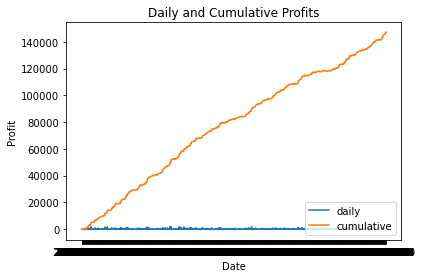

Your total profit is: $147087.82
Your average profit per game is: $59.84
Your total wager amount is: $245800
Your total number of wagers is: 2458
Your average wager per game is: $100


In [37]:
# STRATEGY 1
# Take the model predictions for every game in a given day and bet the same amount on each game

theDict, wagerPerGame = predictionProfits(predictionData, 'EveryMLSameAmount')
letsVisualize(theDict, 'EveryMLSameAmount')

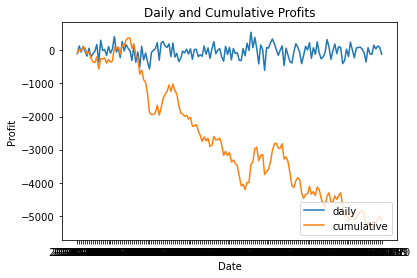

Your total profit is: $-5127.27
Your average profit per game is: $-4.51
Your total wager amount is: $113600
Your total number of wagers is: 1136
Your average wager per game is: $100


In [10]:
# STRATEGY 1 testing on games from 2022

theDict, wagerPerGame = predictionProfits(predictionData2022, 'EveryMLSameAmount')
letsVisualize(theDict, 'EveryMLSameAmount')

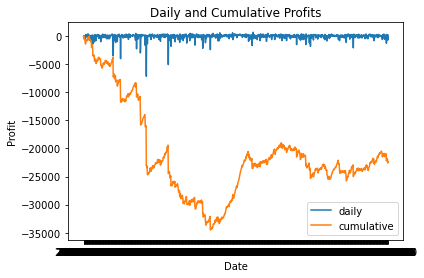

Your total profit is: $-22386.31
Your average profit per game is: $-9.11
Your total wager is: $188086.31
Your average wager per game is: $234.81


In [35]:
# STRATEGY 2
# This strategy will bet a varying amount on every game predicted such that the payout is $100

theDict, wagerPerGame = predictionProfits(predictionData, 'EveryMLToWin100')
letsVisualize(theDict, 'EveryMLToWin100', wagerPerGame=wagerPerGame)

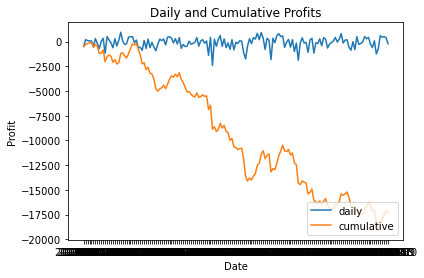

Your total profit is: $-17310.92
Your average profit per game is: $-15.24
Your total wager amount is: $382518.42
Your total number of wagers is: 1136
Your average wager per game is: $336.72


In [11]:
# STRATEGY 2

theDict, wagerPerGame = predictionProfits(predictionData2022, 'EveryMLToWin100')
letsVisualize(theDict, 'EveryMLToWin100', wagerPerGame=wagerPerGame)

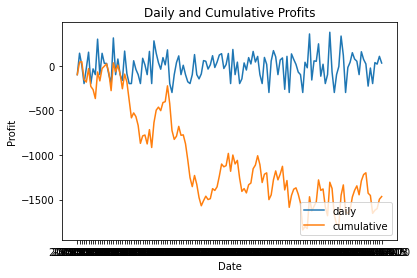

Your total profit is: $-1466.07
Your average profit per game is: $-4.58
Your total wager amount is: $32000
Your total number of wagers is: 320
Your average wager per game is: $100


In [84]:
# STRATEGY 3
# This strategy will bet the same amount on every game with EV > 5

theDict, wagerPerGame = predictionProfits(predictionData2022, 'PositiveEVSameAmount')
letsVisualize(theDict, 'PositiveEVSameAmount', wagerPerGame=wagerPerGame)

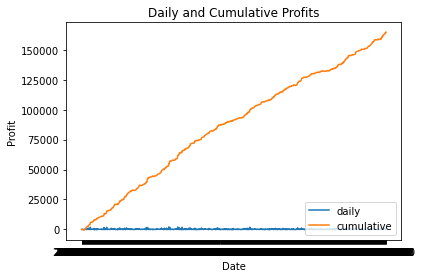

Your total profit is: $164697.72
Your average profit per game is: $108.57
Your total wager amount is: $151700
Your total number of wagers is: 1517
Your average wager per game is: $100


In [45]:
# STRATEGY 3
# Testing over games from all seasons using train test split

theDict, wagerPerGame = predictionProfits(predictionData, 'PositiveEVSameAmount')
letsVisualize(theDict, 'PositiveEVSameAmount', wagerPerGame=wagerPerGame)

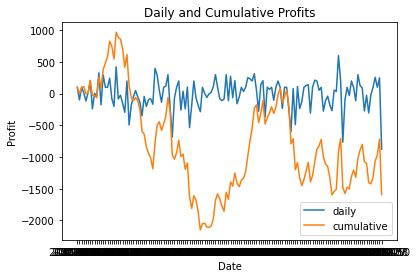

Your total profit is: $-1592.96
Your average profit per game is: $-4.1
Your total wager amount is: $67349.97
Your total number of wagers is: 389
Your average wager per game is: $173.14


In [85]:
# STRATEGY 4
# This strategy will bet a varying amount on games with EV > 5 such that the payout is $100

theDict, wagerPerGame = predictionProfits(predictionData2022, 'PositiveEVToWin100')
letsVisualize(theDict, 'PositiveEVToWin100', wagerPerGame=wagerPerGame)

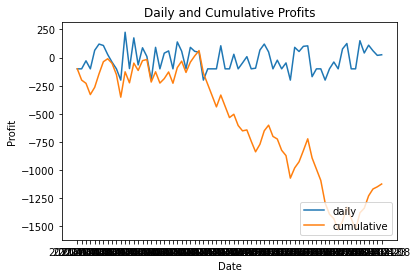

Your total profit is: $-1122.64
Your average profit per game is: $-11.34
Your total wager amount is: $9800.09
Your total number of wagers is: 99
Your average wager per game is: $98.99


In [83]:
# STRATEGY 6
# This strategy will bet a varying amount depending on Kelly Staking Strategy for games with EV > 5

theDict, wagerPerGame = predictionProfits(predictionData2022, 'PositiveEVWithKelly')
letsVisualize(theDict, 'PositiveEVWithKelly', wagerPerGame=wagerPerGame)